# Describing America

In [1]:
%matplotlib inline

In [2]:
from nltk.corpus import inaugural
from collections import Counter
import spacy
import pandas as pd

# Download NLTK's inaugural corpora
import nltk
nltk.download("inaugural")

nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package inaugural to
[nltk_data]     /Users/camden/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [3]:
# get ids and texts of inaugural addresses
ids = inaugural.fileids()
texts = [inaugural.raw(i) for i in ids]

## Most frequent adjective from each speech

In [4]:
# Function to get most common adjective from each text
def most_freq_adj(text):
    doc = nlp(text)
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
    return Counter(adjs).most_common(1)

In [5]:
# Create a list of top adjectives for each inaugural
adjs = [most_freq_adj(text) for text in texts]

In [6]:
pd.DataFrame({'inauguration':ids, 'adjective':adjs})

,inauguration,adjective
0,1789-Washington.txt,"[(public, 6)]"
1,1793-Washington.txt,"[(fellow, 1)]"
2,1797-Adams.txt,"[(foreign, 8)]"
3,1801-Jefferson.txt,"[(own, 6)]"
4,1805-Jefferson.txt,"[(public, 14)]"
5,1809-Madison.txt,"[(public, 6)]"
6,1813-Madison.txt,"[(other, 4)]"
7,1817-Monroe.txt,"[(great, 20)]"
8,1821-Monroe.txt,"[(great, 26)]"
9,1825-Adams.txt,"[(other, 10)]"


## Adjectives over time

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
# Define a function returning ALL adjectives for each text
def all_adj(text):
    doc = nlp(text)
    adjs = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
    return adjs

In [9]:
adjectives = []
for text in texts:
    adjectives = adjectives + all_adj(text)

In [10]:
Counter(adjectives).most_common(3)

[('great', 329), ('other', 264), ('own', 246)]

In [11]:
# return counts of each word in each text
def get_counts(text, word):
    tok = word_tokenize(text)
    tok = [word.lower() for word in tok]
    return tok.count(word)

In [12]:
great = [get_counts(text,'great') for text in texts]
other = [get_counts(text,'other') for text in texts]
own = [get_counts(text,'own') for text in texts]

In [13]:
# get years from fileids
dates = [i.split('-')[0] for i in ids]

In [14]:
adj_df = pd.DataFrame({'great':great, 'other':other, 'own':own})
adj_df.index = pd.to_datetime(dates)

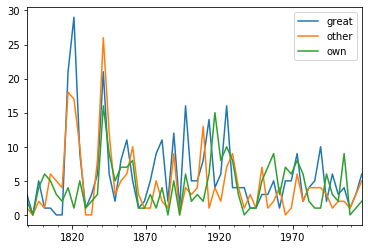

In [15]:
# plot frequencies of each word
adj_df.plot(kind='line')

## Adjectives describing America

In [16]:
def describe_america(text):
    doc = nlp(text)
    adjs = [token.text.lower() for token in doc if (token.pos_ == 'ADJ' and token.head.text == 'America')]
    return adjs

In [17]:
descriptions = []
for text in texts:
    descriptions = descriptions + describe_america(text)

In [18]:
descriptions

['productive', 'strong', 'stronger']